<a href="https://colab.research.google.com/github/JLALLANOSM/Sis420_LlanosMendoza/blob/main/Parcial_Dos/reglogMulticlase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre: LLanos Mendoza Jose Luis Alberto

## Ing Sistemas 


In [38]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


import pandas as pd

from sklearn.model_selection import train_test_split

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#la funcion csvAdapter, nos ayuda al tratamiento de datos, para cuantificar las caracteristicas del dataset

##El siguiente codigo es para realizar la Adaptacion de datos, en otras palabras convertimos las caracteristicas cualitativas a cuantitativas, ya que los entrenamiento y pruebas de un algoritmo de IA, los datos deben ser numericos 

In [40]:
data =pd.read_csv('/content/drive/MyDrive/datasets/zoo.csv')
value = list(data["class_type"].unique())
print("numero de clases",value)
data.info()

numero de clases [1, 4, 2, 7, 6, 5, 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory 

In [41]:
import pandas as pd

def csvAdapter(dataset,modificarColumnas,eliminarColumnas):
    data =pd.read_csv(dataset,encoding='latin-1')#lee y carga el archivo del data set a la variable data
    columna = data.columns #asignamos los nombres de columna a la variables columna

    for index in modificarColumnas:
        name = columna[index]
        value = list(data[name].unique())#obetenemos todos lo valores unicos de cada columna
        data[name] = data[name].map(dict(zip(value,[i for i in range(len(value))]))) #aqui es donde hacemos el tratamiento de datos donde a cada valor unico
                                                                                      #unico digamos un indice, indice que es numerico ejm 0=femenino, 1=masculino
                                                                                    #zip crea una secuencia de duplas
                                                                                    #ditc convierte en un diccionario asigando a cada value el valor numerico correspondiente
                                                                                    #map se realizar un mapeo reemplazando lo que denifio en el diccionario  
    data = data.drop([columna[index]for index in eliminarColumnas],axis=1)#eliminamos las columnas que no interesan en la resolucion o prediccion del problema   
    data = data.dropna()#eliminamos las filas que contengan valores nulos
    #data = pd.DataFrame(data, columns=columna)
    #dataN = data.to_numpy()
    print(data.head())
    return data
rutadataset='/content/drive/MyDrive/datasets/zoo.csv'
columnaCategoricas = [i for i in range(0, 11) if not i in []]# columnas que no necesitan tratamiento
eliminarColumnas=[0]#columnas a eliminar
data = csvAdapter(rutadataset, columnaCategoricas, eliminarColumnas)

#from IPython import display

# ...

#data = csvAdapter(rutadataset, columnaCategoricas, eliminarColumnas)

# Convertir el array de NumPy a DataFrame

#data_df = pd.DataFrame(data, columns=columna)
# Guardar el nuevo dataset en un archivo CSV
#data_df.to_csv('nuevo_dataset.csv', index=False)

# Descargar el archivo CSV
#display.FileLink('nuevo_dataset.csv')


   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     0         0     0     0         0        0         0        0         0   
1     0         0     0     0         0        0         1        0         0   
2     1         0     1     1         0        1         0        0         0   
3     0         0     0     0         0        0         0        0         0   
4     0         0     0     0         0        0         0        0         0   

   breathes  venomous  fins  legs  tail  domestic  catsize  class_type  
0         0         0     0     4     0         0        1           1  
1         0         0     0     4     1         0        1           1  
2         1         0     1     0     1         0        0           4  
3         0         0     0     4     0         0        1           1  
4         0         0     0     4     1         0        1           1  


In [42]:
#data[:,0].size

##2. FUNCION GENERAR DATOS SINTETICO
Utilizamos esta funcion por si el dataset que nos proporcionen pueda tener un numero de **POBLACION MUY BAJA**, y con lo cual nos hace dificil tener un entrenamiento, bueno por lo cual se hace un **aumento de datos**, pero por otra parte **si el aumento de datos no es buena o no tiene una coherencia tal vez adecuada el aprendizaje y prediccion del algoritmo podria empeorar**, de tal manera en esta funcion con unos compañeros y yo trabajando en conjunto tratamos de crear una funcion que nos pueda ayudar a que los **DATOS SINTETICOS** sean lo mas coherente posible, por lo cual pensamos y llegamos a la conclusion de que la mejor manera para una regresion logistica o multiclase seria separar u ordenar por el tipo de clase(osea separar u ordenar el dataset por tipo de clase) y luego utilizar la funcion choice mas random que nos ayuda a generar o mas bien agarrar los valores ya existentes y los copia pero aleatoriamente numeros aleatorios basados en los datos existentes en el dataset y de esta manera vamos generando datos para cada tipo de clase.
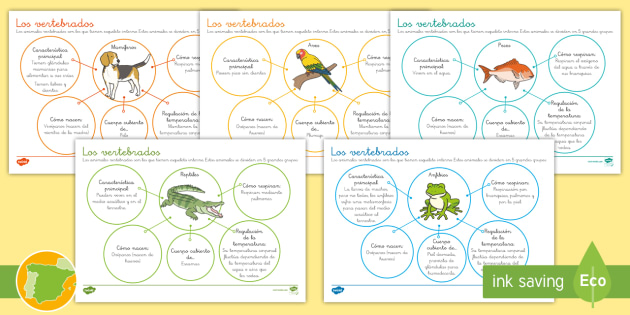


---
El motivo por lo que pensamos que este codigo esta bien es porque aun principio generabamos datos aleatorios sin importar que caracteristicas (hablamos de las X) generaba para una una determinada clase(Hablamos de las Y), en otras palabras mas simples todos se mezclaban y lo cual generaba un entrenamiento y prediccion baja o muy baja. 


In [43]:
value = list(data["class_type"].unique())
print("numero de clases",value)
data.info()

numero de clases [1, 4, 2, 7, 6, 5, 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [44]:
#aqui es donde separamos el dataset en diferentes clases ente caso es multiclase osea 0, 1, 2, 3,...
ListaData=[]
for i in range(0,len(value)):
    ListaData.append(data[data['class_type'] == i]) 

In [45]:
ListaData[1]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,1
1,0,0,0,0,0,0,1,0,0,0,0,0,4,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,1,1
5,0,0,0,0,0,0,1,0,0,0,0,0,4,1,0,1,1
6,0,0,0,0,0,0,1,0,0,0,0,0,4,1,1,1,1
9,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,1
10,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,1,1
17,0,0,0,0,0,0,1,0,0,0,0,0,4,1,0,1,1
19,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1


In [46]:
print('Dataset original', len(data))

Dataset original 101


In [47]:
import random
def DatosSinteticos(data,listaData,n_filas,clases):
    nuevos_datos=np.empty([n_filas,len(data.columns)]) #creamos una dataset vacio de las nfilas y columasn que tenga nuestro dataset original
    ColmunaY = np.random.randint(1,clases, n_filas)#generamos aleatoriamente datos para la columna de las Y o los tipos de clases 
    #print(ColmunaY)
    for i in range(len(data.columns)-1):#for para iterar solo las X (caracteristicas de las clases)
        for j in range(0,n_filas):#for para iterar cada fila osea 10000
            pos=ColmunaY[j]#obtenemos la posiscion de la cada y en la columnaY
            columna_i =listaData[pos].iloc[:,i] #obtenemos la columnas donde hay llenar 
            muestras_i=np.random.choice(columna_i,1,replace=True)# llenamos los datos en esa columnas anteriormente calculada 

            probalidad_de_cambio = random.random()#calculamos un numero pequeño para realizar el cambio (una valor entre 0 y 1) 1 no entra
            if probalidad_de_cambio<0.2: #si nuestra probalidad fuese menor 20% o 0.2 sumamos esa cantidad  
                muestras_i=muestras_i+probalidad_de_cambio
            elif probalidad_de_cambio<0.1:#si nuestra probalidad fuese menor 10% o 0.1 restamos esa cantidad 
                muestras_i=muestras_i-probalidad_de_cambio 
            
            muestras_i=muestras_i.round(2) #Redondeamos si al segundo digito si esq nos genera un numero con muchos decimales 
            #np.random.seed()
            nuevos_datos[j:,i]=muestras_i #cargamos nuestras muestras a la matriz vacia que creamos
            nuevos_datos[j:,11]=ColmunaY[j]#cargamos las y a la matriz vacia
    columnas =list(data.columns)#obtenemos los nombres de las columnas del dataset original
    print(nuevos_datos)
    nuevos_datos_df=pd.DataFrame(nuevos_datos,columns=columnas) #creamos un nuevo DataFrame con los nuevos datos y las columnas que tiene el data original
    dataExtend =pd.concat([data,nuevos_datos_df],axis=0)#unimos el dataframe creado y el dataset original y asi conseguimos el data aumentado o extendido
    #print(dataExtend.tail())
    return dataExtend

data=DatosSinteticos(data,ListaData,10000,7)
#data.to_csv('data_sintetico.csv',index=False)

[[1.00e+000 0.00e+000 1.00e+000 ... 0.00e+000 0.00e+000 1.98e-323]
 [1.00e+000 0.00e+000 1.00e+000 ... 0.00e+000 1.14e+000 0.00e+000]
 [1.00e+000 4.00e-002 1.14e+000 ... 1.50e-001 0.00e+000 1.98e-323]
 ...
 [1.00e+000 7.00e-002 1.00e+000 ... 0.00e+000 0.00e+000 0.00e+000]
 [1.07e+000 0.00e+000 1.00e+000 ... 0.00e+000 1.30e-001 0.00e+000]
 [0.00e+000 1.90e-001 0.00e+000 ... 1.70e-001 1.00e+000 0.00e+000]]


In [48]:
print('Dataset aumentada', len(data))

Dataset aumentada 10101


In [49]:
data = data.to_numpy()#convertimos el dataframe en un dataset tipo numpy

In [54]:

#data = pd.read_csv('/content/drive/MyDrive/datasets/prediccionlluevia.csv', sep=',')
#data.head()
#value = list( data["PROFILE"].unique())
#print(len(value))
# Ingresar imágenes de dígitos de 20x20
input_layer_size  = 400

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 4

#  datos de entrenamiento almacenados en los arreglos X, y
#data = loadmat(os.path.join('/content/drive/MyDrive/datasets/prediccionlluevia.csv'))
#X, y = data['X'], data['y'].ravel()
# establecer el dígito cero en 0, en lugar del 10 asignado a este conjunto de datos
# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
#y[y == 10] = 0
#___________________________________________________________________________________________________
#___________________________________________________________________________________________________
#data = data.to_numpy()
#X, y = data[:, 0:9], data[:, 9]
#X, y = data[:3000, 0:9], data[:3000, 9] # para el 30 % de los datos 
X, y = data[:, 0:16], data[:, 16]# para el 60% de los datos 
#y =  y.round()
#print(y[7000])
m = y.size
m

10101

##La siguiente linea de codigo sirve para crear x de prueba y x de entrenamiento

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [56]:
print(X)
print(y)

[[0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 1.   0.   1.  ]
 [1.   0.   1.   ... 1.   0.   0.  ]
 ...
 [1.   0.07 1.   ... 0.   0.   0.  ]
 [1.07 0.   1.   ... 1.12 0.   0.13]
 [0.   0.19 0.   ... 1.   0.17 1.  ]]
[1. 1. 4. ... 0. 0. 0.]


### 1.2 Visualización de los datos

Se comenzará visualizando un subconjunto del conjunto de entrenamiento. Se selecciona al azar, 100 filas de `X` y pasa esas filas a la función` displayData`. Esta función asigna cada fila a una imagen en escala de grises de 20 píxeles por 20 píxeles y muestra las imágenes juntas.

In [57]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

In [58]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
#rand_indices = np.random.choice(m, 100, replace=False)
#sel = X[rand_indices, :]

#displayData(sel)

In [59]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
print(X_t)
# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


In [60]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [61]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y 
    el gradiente del costo w.r.t. a los parámetros.
    
    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas 
        incluida la intercepcion
        
    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de 
        caracteristicas (incluida la intercepcion).
    
    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos
    
    lambda_ : float
        Parametro de regularización. 
    
    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada. 
    
    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la 
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores utiles
    m = y.size
    epzilon = 1e-8 
    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    temp = theta
    temp[0] = 0
    
    J = (1 / m) * np.sum(-y.dot(np.log(h+epzilon)) - (1 - y).dot(np.log(1 - h+epzilon))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [62]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


<a id="section2"></a>
### 1.4 Clasificacion One-vs-all
En esta parte del ejercicio, se implementará la clasificación de uno contra todos mediante el entrenamiento de múltiples clasificadores de regresión logística regularizados, uno para cada una de las clases $K$ en nuestro conjunto de datos. En el conjunto de datos de dígitos escritos a mano, $K = 10$, pero su código debería funcionar para cualquier valor de $K$.

El argumento `y` de esta función es un vector de etiquetas de 0 a 9. Al entrenar el clasificador para la clase $k \in \{0, ..., K-1 \} $, querrá un vector K-dimensional de etiquetas $y$, donde $y_j \ in 0, 1$ indica si la instancia de entrenamiento $j ^ {th}$ pertenece a la clase $k$ $(y_j = 1)$, o si pertenece a una clase diferente $(y_j = 0)$.

Además, se utiliza `optimize.minimize` de scipy para este ejercicio.
<a id="oneVsAll"></a>

In [63]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of 
        data points, and n is the number of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 
    
    y : array_like
        The data labels. A vector of shape (m, ).
    
    num_labels : int
        Number of possible labels.
    
    lambda_ : float
        The logistic regularization parameter.
    
    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 2000}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta

In [64]:
lambda_ = 0.001 #modificamos para tratar de encontrar el mejor costo y las mejores thetas 
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)
all_theta

(4, 17)


array([[ 1.13992616e+00, -6.87275467e-02,  1.19485155e+00,
        -7.26224738e-01, -1.17315599e+00, -4.85769371e-02,
        -3.34807155e-01, -1.69648161e-01,  8.74756877e-02,
        -9.35322444e-01, -4.47908471e-02,  1.10803034e-01,
         7.44833078e-01, -7.97563816e-02,  5.81839392e-01,
        -1.92587261e-01,  1.53736619e-01],
       [ 2.16209812e+01,  2.16946423e+00, -7.26682878e+00,
        -1.27355274e+01, -2.27334524e+01, -8.78287469e+00,
         8.28656527e+00, -5.36337877e+00, -3.50962671e+00,
        -5.33460419e+00, -1.01480838e+01, -1.09448187e+01,
        -3.06061865e+01, -1.48760412e+00, -1.08446771e+00,
        -1.35214790e+00,  2.21616765e+00],
       [-4.41270656e+00,  1.06313582e-01,  7.35415534e+00,
         1.75020331e-01,  6.33091373e-02,  2.33784488e+00,
         2.06672910e-01, -1.05202139e+00,  3.16927139e+00,
        -3.82367035e+00, -1.97143702e+00, -1.88754269e+00,
        -8.77316267e+00, -1.23563103e+00,  1.75541988e-01,
        -6.71961472e-03,  8.8

<a id="section3"></a>
#### 1.4.1 Prediccion One-vs-all

Después de entrenar el clasificador de one-vs-all, se puede usarlo para predecir el dígito contenido en una imagen determinada. Para cada entrada, debe calcular la "probabilidad" de que pertenezca a cada clase utilizando los clasificadores de regresión logística entrenados. La función de predicción one-vs-all seleccionará la clase para la cual el clasificador de regresión logística correspondiente genera la probabilidad más alta y devolverá la etiqueta de clase (0, 1, ..., K-1) como la predicción para el ejemplo de entrada.

In [65]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas. 
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase. 
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1] 
    predice clases 0, 2, 0, 1 para 4 ejemplos).
    
    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.
    
    X : array_like
        Data points to predict their labels. This is a matrix of shape 
        (m x n) where m is number of data points to predict, and n is number 
        of features without the bias term. Note we add the bias term for X in 
        this function. 
    
    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """
    
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

Una vez que haya terminado, se llama a la función `predictOneVsAll` usando el valor aprendido de $\theta$. Debería apreciarse que la precisión del conjunto de entrenamiento es de aproximadamente 95,1% (es decir, clasifica correctamente el 95,1% de los ejemplos del conjunto de entrenamiento).

In [75]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
fila = 500
XPrueba = X_test[fila:fila+1, :].copy()
print(XPrueba.shape)
print('________________________________________')
#print(np.ones((1)))
print(XPrueba)
print('________________________________________')
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape)
print('________________________________________')
print('la clases real es= ', y_test[fila])
print('________________________________________')
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print('la clases predecida es= ',p)

#displayData(X[4002:4003, :])

(10101, 16)
Precision del conjuto de entrenamiento: 89.48%
(1, 16)
________________________________________
[[1.   0.   0.   1.   0.   0.   0.   1.   0.   0.   1.   3.   0.03 1.
  0.   1.  ]]
________________________________________
(1, 17)
________________________________________
la clases real es=  0.0
________________________________________
la clases predecida es=  [0]
